# Hurst Exponent

- If the Hurst exponent is below 0.5, the market is mean reverting. Reversal strategies win in these markets.
- If the Hurst exponent of 0.5 means the market is random. In this case, a trading strategy that relies on the market direction will lose
- If the Hurst exponent is above 0.5 the market is trending. Markets with a high Hurst exponent are perfect for trend-following strategies.


# Libraries

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from openbb_terminal.sdk import openbb

#  Vars & Data

Loading Daily data for ^GSPC with starting period 2001-01-26.

<AxesSubplot: title={'left': 'S&P 500'}, xlabel='date'>

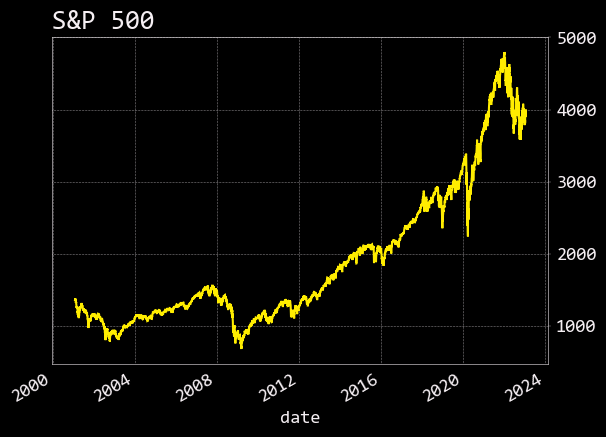

In [7]:
# Set the start date to 22 years ago
then: str = (datetime.today() - timedelta(days=(365*22))).strftime('%Y-%m-%d')
now: str = datetime.today().strftime('%Y-%m-%d')

# Load S&P 500 data
df = openbb.stocks.load("^GSPC", start_date=then, end_date=now)["Adj Close"]
df.plot(title="S&P 500")

# Calculate the Hurst exponent

- The Hurst exponent uses lags to measure the long-term memory of the time series
- For each lag in the range, calculate the standard deviation of the differenced series
- Then calculate the slope of the log lags versus the standard deviations

In [8]:
def get_hurst_exponent(ts, max_lag=20):
    lags = range(2, max_lag)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    
    return np.polyfit(np.log(lags), np.log(tau), 1)[0]


# Determine the type of market

In [9]:
for lag in [20, 100, 250, 500, 1000]:
    hurst_exp = get_hurst_exponent(df.values, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")

20 lags: 0.4774
100 lags: 0.4321
250 lags: 0.4738
500 lags: 0.4750
1000 lags: 0.4418


# Zoom in on specific time period

In [15]:
shorter_series = df.loc["2021":"2022"].values
for lag in [20, 100, 250, 500]:
    hurst_exp = get_hurst_exponent(shorter_series, lag)
    print(f"{lag} lags: {hurst_exp:.4f}")


20 lags: 0.4503
100 lags: 0.3985
250 lags: 0.4628
500 lags: -0.0442
